# Concevez une application au service de la santé publique

Pour répondre à un appel de projet, on nous propose de concevoir une application pour assister une population dans le choix de ses produits alimentaires à partir de la banque de données Open Food Fact.

Pour comprendre le potentiel de ces données et quelles possibilités elles offrent pour la conception d'uine application, il faudra déjà les explorer.

On nettoiera ensuite le jeu de données pour l'analyser plus en profondeur après avoir trouvé un concept d'application intéressant.

In [ ]:
#Importation des bibliothèques colab
from google.colab import drive
from google.colab import files

In [ ]:
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [ ]:
#Importation des bibliothèques
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
import random

In [ ]:
#Chargement des données
rawData = pd.read_csv('https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv',sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,8,13,27,28,29,31,47,52,55,64) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Affichage des premières lignes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
rawData.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
#Taille du jeu de données
rawData.shape

(1805550, 186)

Le fichier contient un très grand nombre de données, il comprends 1 798 570 produits et 186 critères sur chaque produits.

## Nettoyage des données

## Limitation à la France
Nous allons limiter le public ciblé par l'application à la France.

On obtient de nombreuses déclinaison différentes incluant le pays France dans différentes langues. Pour récupérer la plus large proportion de données possibles concernant des produits disponibles en France.

In [ ]:
#Affichage des 50 valeurs les plus utilisées dans la colonne 'countries'
countriesSeries=(rawData['countries'].value_counts())
countriesSeries.sort_values(inplace=True)
countriesSeries.tail(50)

en:Netherlands              2273
Francia                     2310
France, Suisse              2355
en:Switzerland              2356
en:ie                       2380
en:Ireland                  2399
en:Spain                    2401
us                          2565
en:Australia                2882
en:au                       2997
Frankreich,Deutschland      3035
Italia                      3090
México                      3198
Australia                   3270
en:CH                       3277
en:Italy                    3436
Italy                       3594
Frankreich, en:de           3741
Belgium                     3760
Canada                      4154
en:Canada                   4227
Belgique                    5147
Germany                     5500
Switzerland                 6160
Francia,España              6173
Ireland, Germany            6947
en:BE                       7514
United Kingdom              8739
Suisse                     10897
en:United Kingdom          12033
Spain     

In [ ]:
#Restriction aux principales valeurs de countries contenant une variation de France
dataFrance = rawData.query('countries == "Francia,España" or countries == "en:France" or countries == "en:FR" or countries == "en:france" or countries == "en:fr" or countries == "France" or countries == "Frankreich,Deutschland" or countries == "France, Suisse" or countries == "Francia"')
#Taille du jeu de données France
dataFrance.shape

(741389, 186)

In [ ]:
#On réinitialise l'index, opération nécessaire pour le fonctionnement de procédures de nettoyage ultérieures. cf: retrait des lignes ayant trop de valeurs manquantes
dataFrance.reset_index(drop=True, inplace=True)

## Valeurs manquantes

In [ ]:
# Affichage des valeurs manquantes par colonnes en nombre et en ratio
#Initialisation
missingValueNumber = 0
missingValueNumberTotal = 0
missingValuesList = list()

#Boucle de calcul et d'affichage par colonnes
for col in dataFrance :
    missingValueNumber = dataFrance[col].isna().sum()
    missingValueRatio = missingValueNumber / dataFrance[col].size
    print (f'Colonne : {col} : {missingValueNumber} valeurs manquantes, ratio : {round(missingValueRatio,2)}')
    missingValueNumberTotal = missingValueNumberTotal + missingValueNumber
    missingValuesList.append(missingValueRatio)

# Affichage des valeurs manquantes au total en nombre et en ratio
missingValueRatioTotal = missingValueNumberTotal / dataFrance.size
print(f'Le data frame comprends {missingValueNumberTotal} valeurs manquantes au total soit un ratio de {round(missingValueRatioTotal,2)}')

Colonne : code : 0 valeurs manquantes, ratio : 0.0
Colonne : url : 0 valeurs manquantes, ratio : 0.0
Colonne : creator : 1 valeurs manquantes, ratio : 0.0
Colonne : created_t : 0 valeurs manquantes, ratio : 0.0
Colonne : created_datetime : 0 valeurs manquantes, ratio : 0.0
Colonne : last_modified_t : 0 valeurs manquantes, ratio : 0.0
Colonne : last_modified_datetime : 0 valeurs manquantes, ratio : 0.0
Colonne : product_name : 21913 valeurs manquantes, ratio : 0.03
Colonne : abbreviated_product_name : 735864 valeurs manquantes, ratio : 0.99
Colonne : generic_name : 674642 valeurs manquantes, ratio : 0.91
Colonne : quantity : 519626 valeurs manquantes, ratio : 0.7
Colonne : packaging : 596282 valeurs manquantes, ratio : 0.8
Colonne : packaging_tags : 596287 valeurs manquantes, ratio : 0.8
Colonne : packaging_text : 739137 valeurs manquantes, ratio : 1.0
Colonne : brands : 366170 valeurs manquantes, ratio : 0.49
Colonne : brands_tags : 366202 valeurs manquantes, ratio : 0.49
Colonne : cat

On constate 80% de valeurs manquantes avec de nombreuses colonnes ayant une quasi totalité de valeurs manquantes. Ces colonnes seront inexploitables, on va donc les supprimer mais pour cela nous devons nous fixer un seuil.

Text(0.5, 1.0, 'Taux de valeurs manquantes')

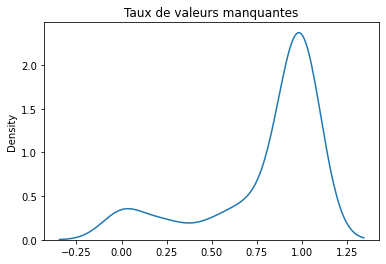

In [ ]:
# Création d'un graphique d'estimation de densité par noyau
sns.kdeplot(missingValuesList)
plt.title('Taux de valeurs manquantes')

A partir de cette courbe de densité, on peut voir que fixer un seuil de valeurs manquantes trop restrictif (exemple : 0.25) reviendrait à écarter beaucoup de critères. On se propose donc de fixer un seuil à 85%.


In [ ]:
# Retrait des colonnes ayant plus de 85% de valeurs manquantes
# Création d'un masque
mask = list()
for item in missingValuesList :
    if item >0.85 :
      mask.append(True)
    else :
      mask.append(False)
#Liste des colonnes à retirer
colRemoved = dataFrance.columns[mask]
# Retrait des colonnes
workData1 = dataFrance.drop(colRemoved, axis=1)
print(f'{len(colRemoved)} colonnes ont été retirées')

130 colonnes ont été retirées


In [ ]:
#Colonnes restantes
workData1.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'labels', 'labels_tags',
       'labels_en', 'stores', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'ecoscore_score_fr',
       'ecoscore_grade_fr', 'main_category', 'main_category_en', 'image_url',
       'image_small_url', 'image_ingredients_url',
       'image_ingredients_small_url', 'image_nutrition_url',
       'image_nutrition_small_url', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'f

### Colonnes les plus pertinentes
Pour savoir quels produits écarter de notre jeu de données en fonction des données manquantes les concernant, il nous faut d'abord définir les colonnes qui vont servir à notre étude.


In [ ]:
workData1.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,stores,countries,countries_tags,countries_en,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,375.0,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,NaN,NaN,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",Delois france,fr:delois-france,fr:delois-france,courte paille,France,en:france,France,eau graines de téguments de moutarde vinaigre ...,0.0,0.0,0.0,18.0,d,NaN,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",60.0,b,en:mustards,Mustards,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,936.0,8.2,2.20,29.0,22.0,0.0,5.1,4.60,1.840,18.0
3,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,dgesc,NaN,NaN,Watt,watt,Xsf,fr:xsf,fr:xsf,NaN,NaN,NaN,NaN,en:France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,fr:xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,https://

On retiendra : product_name, quantity, nutriscore_score, nutriscore_grade et les valeurs nutritionnelles pour 100gr (se terminant par _100g).

Text(0.5, 1.0, 'Taux de valeurs manquantes')

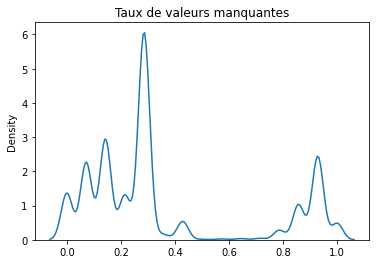

In [ ]:
# Valeurs manquantes par ligne
# Liste des colonnes pertinentes
valuableColumns = ['product_name', 'nutriscore_grade', 'quantity']
for col in workData1.columns :
    if col.endswith('_100g'):
      valuableColumns.append(col)

#Initialisation
missingValuesList = list()
missingValuesList = workData1[valuableColumns].isna().sum(axis=1)/len(valuableColumns)

# Création d'un graphique d'estimation de densité par noyau
sns.kdeplot(missingValuesList)
plt.title('Taux de valeurs manquantes')


Vu la courbe de densité, on se propose de fixer un objectif à 40% de valeurs manquantes maximum.


In [ ]:
# Retrait des lignes ayant plus de 40% de valeurs manquantes
# Création d'un masque
mask = list()
for item in missingValuesList :
    if item >0.40 :
      mask.append(True)
    else :
      mask.append(False)

# Retrait des lignes, après avoir testé un exemple d'application avec itterows(), la procédure est trop longue
# Création d'une liste des index à retirer
maskFrame = pd.DataFrame(mask,columns=['toBeRemoved'])
maskFrame = maskFrame.loc[~(maskFrame==False).any(axis=1)]
rowToDrop = maskFrame.index.to_list()



In [ ]:
#Retrait des lignes ayant plus de 40% de valeurs manquantes
workData2 = workData1.drop(rowToDrop, axis=0)

In [ ]:
#Nombre de lignes retirées
workData1.shape[0]-workData2.shape[0]


190948

## Retrait des colonnes inutiles

Dans cette section, on va retirer les colonnes arbitrairement désignées comme inutiles.

In [ ]:
workData2.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,stores,countries,countries_tags,countries_en,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,375.0,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.4,0.56,NaN


In [ ]:
colToRemove = ['url', 'creator', 'created_t', 'created_datetime', 'stores', 'packaging', 'packaging_tags', 'last_modified_t', 'last_modified_datetime', 'brands', 'brands_tags', 'categories_en', 'countries_tags', 'countries', 'countries_en', 'ingredients_text', 'states', 'states_tags', 'states_en', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url', 'labels', 'labels_tags',	'labels_en',]

In [ ]:
# Retrait des colonnes
workData3 = workData2.drop(colToRemove, axis=1)
print(f'{len(colToRemove)} colonnes ont été retirées')

29 colonnes ont été retirées


## Duplicates

In [ ]:
#Retrait des duplicatas
workData3.drop_duplicates(inplace=True)

## Clé candidate

In [ ]:
# Test de possibles clés candidates
for col in workData3.columns :
    candidateKey = workData3[col].shape==workData3[col].unique().shape
    print (col, candidateKey)

code False
product_name False
quantity False
categories False
categories_tags False
additives_n False
ingredients_from_palm_oil_n False
ingredients_that_may_be_from_palm_oil_n False
nutriscore_score False
nutriscore_grade False
nova_group False
pnns_groups_1 False
pnns_groups_2 False
ecoscore_score_fr False
ecoscore_grade_fr False
main_category False
energy-kcal_100g False
energy_100g False
fat_100g False
saturated-fat_100g False
carbohydrates_100g False
sugars_100g False
fiber_100g False
proteins_100g False
salt_100g False
sodium_100g False
nutrition-score-fr_100g False


Aucune variable prise seule n'est clé candidate.

## Défauts de format

In [ ]:
workData3.head(1)

,code,product_name,quantity,categories,categories_tags,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,main_category,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,375.0,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.4,0.56,NaN


In [ ]:
#En consultant les valeurs uniques de certaines variables, on peut repérer des défauts de format
#Nombre de valeurs uniques par colonnes
for col in workData3.columns:
  print(len(workData3[col].unique()))


550418
384398
16484
39387
32128
30
5
8
55
6
5
15
46
142
6
12823
5435
4427
5652
4359
7370
5907
1290
4824
6601
6631
55


Etudions les valeurs de format des colonnes 9-18 et 30, les autres colonnes contiennent trop de valeurs pour être étudiées de cette façon.




In [ ]:
workData3['additives_n'].unique()

array([nan,  0.,  5.,  1.,  2.,  3.,  4., 10.,  7.,  8.,  6., 11.,  9.,
       12., 17., 13., 20., 15., 16., 14., 19., 18., 22., 23., 30., 21.,
       28., 26., 24., 25.])

In [ ]:
workData3['ingredients_from_palm_oil_n'].unique()

array([nan,  0.,  1.,  3.,  2.])

In [ ]:
workData3['ingredients_that_may_be_from_palm_oil_n'].unique()

array([nan,  0.,  2.,  1.,  4.,  3.,  5.,  6.])

In [ ]:
workData3['nutriscore_score'].unique()

array([ nan,  18.,   1.,  14.,  -2.,   4.,   0.,  -4.,  15.,  17.,  21.,
         2.,  29.,   6.,  22.,   5.,  28.,  20.,   3.,  16.,   9.,  19.,
        24.,  13.,  36.,  -3.,  12.,  10.,  23.,  11.,   7.,   8.,  25.,
        -7.,  -1.,  -6.,  -5.,  27.,  30.,  26., -11.,  -8.,  31., -10.,
        -9.,  33.,  34.,  37.,  32., -15.,  35., -12., -13.,  40., -14.])

In [ ]:
workData3['nutriscore_grade'].unique()

array([nan, 'd', 'b', 'a', 'c', 'e'], dtype=object)

Jusqu'ici, les valeurs sont cohérentes avec la variable et il n'y a rien à signaler.

###Variable pnns_groups_1

In [ ]:
workData3['pnns_groups_1'].unique()

array(['unknown', 'Fat and sauces', 'Composite foods', 'Sugary snacks',
       'Fruits and vegetables', 'Milk and dairy products',
       'Fish Meat Eggs', 'Cereals and potatoes', 'Salty snacks',
       'Beverages', 'sugary-snacks', 'fruits-and-vegetables', nan,
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

Ici on peut noter des catégories de nature identique mais de nom différent, il faudrait les rassembler (ex : Salty snacks et salty-snacks). Ces différences sont dues à l'empoi de majuscules ou de caractères spéciaux, il nous suffit de les remplacer.

In [ ]:
# Remplacement des Nan par 'Unknown'
workData3['pnns_groups_1'].fillna('unknown',inplace=True)

#Définition de fonctions de formatage
def lower(stringToLower):
  #Renvoie la chaine de caractères en minuscule
  return stringToLower.lower()

def formatSpecials(stringToFormat):
  #Remplace les tirets par des espaces
  stringFormated = stringToFormat
  specialsList = ['-','_']
  for elt in specialsList :
    stringFormated = stringFormated.replace(elt, ' ')
  return stringFormated

#Application des fonctions de formatage
workData3['pnns_groups_1'] = workData3['pnns_groups_1'].apply(lower)
workData3['pnns_groups_1'] = workData3['pnns_groups_1'].apply(formatSpecials)

### Variable pnns_groups_2

In [ ]:
workData3['pnns_groups_2'].unique()

array(['unknown', 'Dressings and sauces', 'One-dish meals',
       'Biscuits and cakes', 'Fruits', 'Cheese', 'Meat', 'Bread',
       'Fish and seafood', 'Salty and fatty products', 'Fruit juices',
       'Sweets', 'Fats', 'Dairy desserts', 'Pizza pies and quiche',
       'Unsweetened beverages', 'Nuts', 'Sweetened beverages', 'Cereals',
       'Appetizers', 'Dried fruits', 'pastries', 'Vegetables',
       'Breakfast cereals', 'Processed meat', 'Sandwiches', 'Legumes',
       'Milk and yogurt', 'Teas and herbal teas and coffees', 'Soups',
       'Potatoes', 'Artificially sweetened beverages',
       'Chocolate products', 'Plant-based milk substitutes', 'vegetables',
       'Ice cream', 'Fruit nectars', 'Waters and flavored waters',
       'Alcoholic beverages', 'Eggs', 'fruits', 'Offals',
       'Pizza pies and quiches', 'legumes', 'cereals', 'nuts'],
      dtype=object)

Ici on peut noter une problématique similaire à la variable pnns_groups_1 avec en plus des problmes liés au nombre (singulier/pluriel) et à la langue.

In [ ]:
# Remplacement des Nan par 'Unknown'
workData3['pnns_groups_2'].fillna('unknown',inplace=True)


def mergeGroups (groupToMerge):
  #Regroupe les aliments de même catégorie
  if groupToMerge == 'legumes':
    return 'vegetables'
  elif groupToMerge == 'pizza pies and quiche':
    return 'pizza pies and quiches'
  elif groupToMerge == 'fruit nectars':
    return 'fruit juices'
  else :
    return groupToMerge
  

# Application des fonctions formatage
workData3['pnns_groups_2'] = workData3['pnns_groups_2'].apply(lower)
workData3['pnns_groups_2'] = workData3['pnns_groups_2'].apply(formatSpecials)
workData3['pnns_groups_2'] = workData3['pnns_groups_2'].apply(mergeGroups)



In [ ]:
workData3['pnns_groups_2'].unique()

array(['unknown', 'dressings and sauces', 'one dish meals',
       'biscuits and cakes', 'fruits', 'cheese', 'meat', 'bread',
       'fish and seafood', 'salty and fatty products', 'fruit juices',
       'sweets', 'fats', 'dairy desserts', 'pizza pies and quiches',
       'unsweetened beverages', 'nuts', 'sweetened beverages', 'cereals',
       'appetizers', 'dried fruits', 'pastries', 'vegetables',
       'breakfast cereals', 'processed meat', 'sandwiches',
       'milk and yogurt', 'teas and herbal teas and coffees', 'soups',
       'potatoes', 'artificially sweetened beverages',
       'chocolate products', 'plant based milk substitutes', 'ice cream',
       'waters and flavored waters', 'alcoholic beverages', 'eggs',
       'offals'], dtype=object)

In [ ]:
workData3['ecoscore_score_fr'].unique()

array([ nan,  60.,  83.,  81.,  34.,  29.,  79.,  80.,   9.,  55.,  24.,
        32.,  53.,  72.,  41.,  74.,  28.,  10.,  35.,  76.,  11.,  66.,
        23.,  33.,  36.,  64.,  42.,   1.,  43.,  26.,  63.,  25.,  20.,
        54.,  37.,  50.,  91.,  22.,  21.,  89.,  19.,  98.,  40.,  77.,
        18.,  31.,  75.,  49., 103.,  45.,  84.,  88.,  -1.,  39.,  69.,
        73.,  -4.,   7.,   8.,  -7., -11.,  44.,   6.,  85.,  90.,  82.,
        67.,  17.,  57.,  56.,  30.,  52.,  -2.,  51.,  65.,  -8.,  61.,
        46.,  62.,  38.,  48.,  59.,  15., 119.,  97., 109.,  12.,  95.,
        78.,  86.,  70.,  58.,  71.,  68.,   2.,  94.,  47.,  16.,  -3.,
        27.,  13.,  14.,  87.,  -5.,   4.,  96., 101., 105.,  93., 115.,
         3., -12.,   0.,  92.,   5., 114., 104., 100.,  99., 107., 122.,
       121., 120., 106., 108., 111., 102., 112., 116., 113., -14., 117.,
       123.,  -6., 118., 110.,  -9., 124., -13., -10., -23., 125.])

In [ ]:
workData3['ecoscore_grade_fr'].unique()

array([nan, 'b', 'd', 'e', 'c', 'a'], dtype=object)

In [ ]:
workData3['nutrition-score-fr_100g'].unique()

array([ nan,  18.,   1.,  14.,  -2.,   4.,   0.,  -4.,  15.,  17.,  21.,
         2.,  29.,   6.,  22.,   5.,  28.,  20.,   3.,  16.,   9.,  19.,
        24.,  13.,  36.,  -3.,  12.,  10.,  23.,  11.,   7.,   8.,  25.,
        -7.,  -1.,  -6.,  -5.,  27.,  30.,  26., -11.,  -8.,  31., -10.,
        -9.,  33.,  34.,  37.,  32., -15.,  35., -12., -13.,  40., -14.])

Les valeurs de ces dernières variables sont cohérentes et il n'y a rien à signaler.

## Traitement des outliers

Les valeurs nutritionnelles pour 100g sont assez simple à vérifier, d'une part elles ne peuvent pas être négatives et d'autre part, elles ne peuvent dépasser 100 lorsqu'elles sont exprimmées en grammes.

De plus, la somme de ces valeurs ne devrait pas dépasser 100g (à une erreur d'arrondi près). Attention dans ce dernier cas à ce que deux catégories ne se recoupent pas, exemple : les sucres inclus dans les glucides. En effet, si on les ajoute à la somme, il est évident que le ratio dépassera régulièrement les 100g si les sucres inclus dans les glucides (carbohydrates) sont ajoutés à la somme.
Il en est de même pour les quantités de sodium et de sel.

In [ ]:
workData4 = workData3.copy()
workData4.head(1)

,code,product_name,quantity,categories,categories_tags,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,main_category,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,375.0,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.4,0.56,NaN


In [ ]:
# Pour la suite, on va formater les noms de colonne pour retirer les signes spéciaux problématiques avec la fonction query
colNames = workData4.columns.to_list()
newColNames = list()
for name in colNames:
  newName = name.replace('-', '_')
  newColNames.append(newName)
workData4.columns = newColNames

# Comme la variable fibers est bien moins remplie que les autres, la présence de Nan va créer des problèmes dans le test Somme<100, on remplace donc les Nan par 0 pour cette variable
workData4['fiber_100g'].fillna(value=0, inplace=True)

In [ ]:
# Ensemble de valeurs à tester >0
var100g = ['energy_kcal_100g', 'energy_100g',	'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition_score_fr_100g']
# Ensemble de valeurs à tester Somme<100
var100gPt1 = ['fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']
# Ensemble de valeurs à tester <100
var100gPt2 = ['fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']



In [ ]:
#Vérification de valeurs négatives :
outliers = pd.DataFrame()
for i in range(0, len(var100g)-1):
  strToTest = str(f'{var100g[i]}<0')
  outliers = workData4.query(strToTest)
  print(f'On retire {outliers.shape[0]} lignes')
  workData4.drop(outliers.index.to_list(),inplace=True)

On retire 0 lignes
On retire 0 lignes
On retire 0 lignes
On retire 0 lignes
On retire 1 lignes
On retire 1 lignes
On retire 0 lignes
On retire 0 lignes
On retire 0 lignes
On retire 0 lignes


In [ ]:
#Vérification de valeurs à tester <100
outliers = pd.DataFrame()
for i in range(0, len(var100gPt2)-1):
  strToTest = str(f'{var100gPt2[i]}>100')
  outliers = workData4.query(strToTest)
  print(f'On retire {outliers.shape[0]} lignes')
  workData4.drop(outliers.index.to_list(),inplace=True)

On retire 2 lignes
On retire 5 lignes
On retire 7 lignes
On retire 0 lignes
On retire 0 lignes
On retire 2 lignes
On retire 17 lignes


In [ ]:
#Vérification de valeurs à tester Somme<100, en réalité, à cause des erreurs d'arrondi, on va fixer la limite à 103 (ie = 100+0.5*5 arrondi au supérieur)
outliers = pd.DataFrame()
strToTest = str(f'({var100gPt1[0]}+{var100gPt1[1]}+{var100gPt1[2]}+{var100gPt1[3]}+{var100gPt1[4]})>103')
outliers = workData4.query(strToTest)
print(f'On retire {outliers.shape[0]} lignes')
workData4.drop(outliers.index.to_list(),inplace=True)

On retire 1914 lignes


Les maximums que peuvent prendre les valeurs de 'energy_kcal_100g' et 'energy_100g' sont respectivement 937kcal et 3920kJ.

In [ ]:
#Vérification de valeurs limites d'énergie
outliers = pd.DataFrame()
strToTest = str('energy_kcal_100g>937 or energy_100g>3920')
outliers = workData4.query(strToTest)
print(f'On retire {outliers.shape[0]} lignes')
workData4.drop(outliers.index.to_list(),inplace=True)


On retire 1824 lignes


## Export du jeu de données final


In [ ]:
with open('/gdrive/My Drive/Data/dataP3.csv', 'w') as f:
  workData4.to_csv(f, index=False)